<h3><center>Applied Data Mining | Aung Naing Oo | </center></h3>
<h1><center>Lab 5 : Artificial Neural Networks</center></h1>
<img src="neural network picture.png" width="800px" />

Artificial Neural Networks (ANN) are among the most important and widely used machine learning tools available. Researchers and scientists extensively use ANN in various applications such as signal processing, natural language processing, machine vision, autonomous driving, and robotics. In this lab, we first start by looking at TensorFlow Playground. Then we create our neural network using python to do Optical Character Recognition (OCR) using `MNIST dataset`.

### Task A
`TensorFlow Playground` is an interactive neural network visualization platform. With this tool, you can simulate small neural networks in your browser and change its parameters to see their effect on the results. To do so, open this [link](https://playground.tensorflow.org/) and experiment with the tool for different datasets given for a classification problem.

__Questions__: Answer the following questions:
1. Describe why a neural network takes time to train?
1. Describe what are the advantages of the Perceptron Model compared to the McCulloch-Pitts Model?
1. How do you evaluate your neural network model?
1. Describe why the Resilient backpropagation(RPROP) algorithm convergences faster than algorithms with a fixed learning rate?

1. A neural network requires several iterations to reach to a set of weights in the network that produces the desired output for the given inputs. Hence, it takes a long time to train the network for the optimal weights. 

2. McCulloch-Pitts Model can only handle 0/1 input while Perceptron Model can handle real number input.
Also the model does not weigh the inputs making it less flexible while perceptron model can accept varying weights tailored to each input

3. Once the neural network is trained on the Training dataset (typically 50% of training data), the network is then validated with the Validation dataset (typically 25% of training data). This is when the hyperparameter tuning happens. Once that is done, the remaining 25% Test dataset is used to evaluate the model. At this state, no further hyperparameter tuning is done. 

4. Because there is no need to tune the learning rate in RPROP unlike in gradient descent algorithm. 

### Task B

In this task, we will use a random subset of the MNIST dataset. The MNIST database is a large database of images from handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training optical character recognition models. We will use the `scikit-learn` library in python.

In [1]:
# Lets start by reading the data.

import pandas as pd
import matplotlib.pyplot as plt

mnist = pd.read_csv('lab2_data/MNIST_data_subset.csv', index_col = 0)
mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label
29800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
39953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0
50647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0
27973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
12719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


In [2]:
# separate target variable from other variables

x = mnist.drop(columns=['y', 'label'])
y = mnist[['label']]

You can see samples of the images in the dataset by running the code below:

<Figure size 432x288 with 0 Axes>

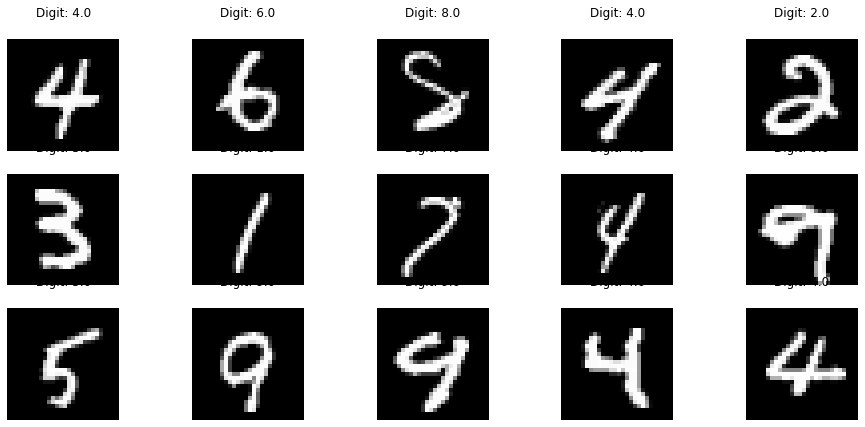

In [3]:
plt.figure()
feat_cols = x.columns
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(y.loc[y.index[i],'label'])) )
    ax.axis('off') 
    ax.matshow(x.loc[x.index[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [12]:
# split data to train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

In [16]:
# create a neural network architecture and train it

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',
                    random_state=22,
                    
                    # tune the following hyperparameters:
                    hidden_layer_sizes=(150,150,50),  
                    max_iter=100,
                    learning_rate_init=0.03 # you can find a list of values of learning_rate in TensorFlow Playground (refer to Task A)
                    # end of hyperparameters
                   )
_ = clf.fit(X_train, y_train)

C:\Users\Naing\anaconda3\envs\ADM_course\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# predict target variable for the test data.

y_pred = clf.predict(X_test)

In [18]:
# Check if we have done a good classification or not?

from sklearn.metrics import classification_report, confusion_matrix
print('confusion_matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nclassification_report:')
print(classification_report(y_test, y_pred))

confusion_matrix:
[[178   1   2   4   0   4   2   1   0   0]
 [  0 174   3   0   0   3   0   2   2   1]
 [  2   0 179   6   0   1   3   2   2   1]
 [  0   0   3 175   0   9   0   2   1   0]
 [  1   0   8   0 150   2   4   2   1  10]
 [  1   0   1   3   1 152   1   0   1   1]
 [  2   0   1   0   0   1 175   0   0   0]
 [  0   0   9   2   0   1   1 205   0   2]
 [  0   1   3   5   0   7   7   0 155   1]
 [  0   1   0   4   5   0   0   7   6 152]]

classification_report:
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       192
         1.0       0.98      0.94      0.96       185
         2.0       0.86      0.91      0.88       196
         3.0       0.88      0.92      0.90       190
         4.0       0.96      0.84      0.90       178
         5.0       0.84      0.94      0.89       161
         6.0       0.91      0.98      0.94       179
         7.0       0.93      0.93      0.93       220
         8.0       0.92      0.87      0

__Note:__ If you don't know how to interpret classification report and confusion_matrix, please read the following links: [link1](https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn), [link2](https://stackoverflow.com/questions/30746460/how-to-interpret-scikits-learn-confusion-matrix-and-classification-report)

Try to change different neural network parameters (`hyperparameter tuning`) e.g., hidden layer sizes, the number of hidden layers, max_iter, learning rate, and study how they affect the classification results.

__Note:__ Do not change the random_state parameter. You can find a list of all available parameters and a short description of them [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

__Questions__: Answer the following questions based on your experiments:
1. How many classes are there? 
1. How many input variables we have in our neural network?
1. Describe why we split data into train and test?
1. Define the learning rate and how it affects the learning process and the time taken to train a model?
1. What is the purpose of applying a multi-layer perceptron (MLP) to the data? What other methods do you think would be useful here?
1. Overall, which parameters did you change to get the best results, and how did you evaluate the performance? Report your best performance and parameters. (__Note:__ your best performance should be at least over `0.90 accuracy`)
1. What was the initial accuracy of the model, and how much your parameter tuning improved it?
1. <font color='blue'>Optional</font>: Try to simulate overfitting and underfitting and analyze why your scenarios are causing them.
1. <font color='blue'>Optional</font>: Can you compare the results of MLP with any other classification method(s) that you learned in this course? What conclusions can you draw here?

1. 10 classes. [0 to 9]

2. 784 input variables

3. This is to prevent overfitting. The test data would not be used in hyperparameter tuning. 

4. The learning rate represents the speed at which the model learns to converge in gradient descent such that the error rate is minimum between the predicted output and the desired output. A small learning rate requires a long time to train whereas a large learning rate can converge quicker but produces a suboptimal solution. 

5. A multi-layer perception model is required so that we avoid the underfitting problem with a less complex model.

Since the problem is on classification, SVM with rbf kernel can be used as well as decision tree based classification.

6.hidden_layer_sizes=(150,150,50). # 3 hidden layers with 150 nodes for the first 2 layers and 50 nodes for the 3rd layer 

learning_rate_init=0.03 # a small learning rate of 0.03

7. 
The initial weight average f1 score was 0.03 (3% accuracy) which was very bad. 
After the tuning as mentioned in point 6, the f1 score improved to 0.91 which is 91% accuracy.

<div class="alert alert-block alert-danger">

__IMPORTANT__ 

Please complete this Jupyter Notebook file and upload it to the __Blackboard__. 

__Change the name of your notebook file__ as follows: "`ADM_NN_FirstNameSurname_FirstNameSurname.ipynb`".

    
</div>